# AST 208 Lab 6: Three-Color Image

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i>
\
**Your Name:** Cesarine Graham 
\
**Date:** March 16th, 2023
\
**Team Name:** Table 18
\
**Collaborators:** Josiah, Olivia, Ella, Cesarine 

50 Total Points

## Introduction


<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 1) What is the exposure time for each science image?

<span style="color:red">(2 points)</span>
\
\
<span style="color:dodgerblue">
Bflat.fits : 24.37073 seconds
\
bias.fits : 0 seconds
\
dark.fits : 80 seconds
\
m1_B_raw.fits : 54.8999 seconds
\
m1_r_raw.fits : 36.6 seconds
\
m1_V_raw.fits : 36.6 seconds
\
rflat.fits : 6.84395 seconds
\
Vflat.fits : 3.779277 seconds


In [1]:
#loading in the plotting and numpy packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#for the fits files
from astropy.io import fits

## Load in your images

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 2) In the following cell, load the eight fits files into eight logically named python arrays. Add a print statment for each array to tell us the shape of each frame.

<span style="color:red">(4 points)</span>

In [2]:
#Bflat fits file
frame = fits.open('Bflat.fits')
Bflat = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of Bflat array: " , Bflat.shape)

#bias fits file
frame = fits.open('bias.fits')
bias = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of bias array: " , bias.shape)

#dark fits file
frame = fits.open('dark.fits')
dark = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of dark array: " , dark.shape)

#B_raw fits file
frame = fits.open('m1_B_raw.fits')
B_raw = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of B_raw array: " , B_raw.shape)

#r_raw fits file
frame = fits.open('m1_r_raw.fits')
r_raw = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of r_raw array: " , r_raw.shape)

#V_raw fits file
frame = fits.open('m1_V_raw.fits')
V_raw = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of V_raw array: " , V_raw.shape)

#rflat fits file
frame = fits.open('rflat.fits')
rflat = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of rflat array: " , rflat.shape)

#Vflat fits file
frame = fits.open('Vflat.fits')
Vflat = np.array(frame[0].data,dtype=np.float64)
frame.close()
print("shape of Vflat array: " , Vflat.shape)

shape of Bflat array:  (1024, 1024)
shape of bias array:  (1024, 1024)
shape of dark array:  (1024, 1024)
shape of B_raw array:  (1024, 1024)
shape of r_raw array:  (1024, 1024)
shape of V_raw array:  (1024, 1024)
shape of rflat array:  (1024, 1024)
shape of Vflat array:  (1024, 1024)


## Correct for CCD Bias level
<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 3) In last week's lab, you estimated the typical pixel value of the bias frame with statistics in DS9 (Lab 5, #6). In the code cell below, use array math in python to calculate the equivalent statistic for the bias frame (Recall `np.mean` and `np.median` and print both. This time, you can do the statistics on the whole bias frame, not just a region). Print out these statistics with a print statement (don't forget your units!). How does the number you find here compare with what you found last week?

<span style="color:red">(3 points)</span>

In [3]:
print("the mean pixel value is: " , np.mean(bias) , "[counts/pixel]")
print("the median pixel value is: " , np.median(bias) , "[counts/pixel]")
\
\
print("these values are very close to the values we found in lab5. in lab5, the mean was 1783.81 [counts/pixel] and the median was 1783.8 [counts/pixel]")

the mean pixel value is:  1783.9908548064361 [counts/pixel]
the median pixel value is:  1784.0 [counts/pixel]
these values are very close to the values we found in lab5. in lab5, the mean was 1783.81 [counts/pixel] and the median was 1783.8 [counts/pixel]


<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 4) In the code cell below, subtract the bias image from each of the three science images ($B$, $V$, and $R$). Don't just subtract the average bias level, but subtract the bias *image* (i.e., so that you are subtracting the value of bias pixel[1,1] from the value of science pixel [1,1], and the  value of bias pixel[72,89] from the value of science pixel [72,89], and so on for every pixel).  

<span style="color:red">(2 points)</span>

In [4]:
bias_b = B_raw - bias
bias_v = V_raw - bias
bias_r = r_raw - bias

#print(bias_b)
#print(bias_v)
#print(bias_r)

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 5) Print the median values of the three science images before and after bias subtraction. Is this consistent with what you would expect from #3? Don't forget to explain if your python calculations are consistent with expectations and specify units!

<span style="color:red">(3 points)</span>


In [5]:
print("B image: median value before: " , np.median(B_raw) , "[counts/pixel]")
print("B image: median value after: " , np.median(bias_b) , "[counts/pixel]")

print("")

print("V image: median value before: " , np.median(V_raw) , "[counts/pixel]")
print("V image: median value after: " , np.median(bias_v) , "[counts/pixel]")

print("")

print("R image: median value before: " , np.median(r_raw) , "[counts/pixel]")
print("R image: median value after: " , np.median(bias_r) , "[counts/pixel]")

print("")

print("my expectations were met because the differences in the counts/pixel were equally different for each subtraction.")

B image: median value before:  2110.0 [counts/pixel]
B image: median value after:  326.2857142857142 [counts/pixel]

V image: median value before:  2117.0 [counts/pixel]
V image: median value after:  333.0 [counts/pixel]

R image: median value before:  2185.0 [counts/pixel]
R image: median value after:  400.73333333333335 [counts/pixel]

my expectations were met because the differences in the counts/pixel were equally different for each subtraction.


## Correct for Dark Current

Recall from Lab 5 that he SkyNet dark frame already has had the bias subtracted from it (this step is recorded in the header, denoted as `BIASCORR`)---so the counts in your dark image only represent dark counts. 

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 6) Recall that dark current accumulates in the CCD with time; the longer you expose, the more counts there will be due to dark current. Last week, you found the exposure time of your dark image (Lab 5, #9). In #1 of this lab, you found the exposure time(s) for your science images.  Normally darks are taken at the same exposure time as the science image but in this case we forgot...oops. What factors do you need to scale the dark image by to apply it to your $B$, $V$, and $R$ science frames? 

<span style="color:red">(3 points)</span>

<span style="color:dodgerblue"> You need to scale the dark image by dividing it by 80 and then multiplying it by exposure time for each of the color filters.

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 7) In the code cell below, subtract the scaled dark image from the **bias-subtracted** $B$, $V$, and $R$ science frames. 

<span style="color:red">(3 points total)</span>

In [6]:
darkB = (dark/80)*54.8999
darkV = (dark/80)*36.6
darkR = (dark/80)*36.6

dark_bias_b = bias_b - darkB
dark_bias_v = bias_v - darkV
dark_bias_r = bias_r - darkR

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 8) Print the median values of the three science images after dark subtraction. How does this compare with the bias-subtracted median values from #5? Does this make sense, based on what you estimated in #6 and the dark statistics you measured in Lab 5?

<span style="color:red">(4 points)</span>

In [7]:
print("B image: median value before: " , np.median(bias_b) , "[counts/pixel]")
print("B image: median value after: " , np.median(dark_bias_b) , "[counts/pixel]")

print("")

print("V image: median value before: " , np.median(bias_v) , "[counts/pixel]")
print("V image: median value after: " , np.median(dark_bias_v) , "[counts/pixel]")

print("")

print("R image: median value before: " , np.median(bias_r) , "[counts/pixel]")
print("R image: median value after: " , np.median(dark_bias_r) , "[counts/pixel]")

print("")

print("my expectations were met because the differences in the counts/pixel were equally different for each subtraction.")

B image: median value before:  326.2857142857142 [counts/pixel]
B image: median value after:  317.1290266876737 [counts/pixel]

V image: median value before:  333.0 [counts/pixel]
V image: median value after:  326.6393707059714 [counts/pixel]

R image: median value before:  400.73333333333335 [counts/pixel]
R image: median value after:  394.1316664339701 [counts/pixel]

my expectations were met because the differences in the counts/pixel were equally different for each subtraction.


## Correct for Flat Field

Recall from Lab 5 that the flat field image you download from SkyNet has already had the bias frame and dark frame subtracted from it (as seen by `BIASCORR`, `DARKCORR`, and `DARKSCAL` in the header).

To correct our science image, we don't want to subtract the flat image; rather, we want to divide by the flat image. To do this without reducing the brightness of our science image, we'll first *normalize* our flat image so that its median pixel value is 1. That is, if everything were uniform and our flat image was truly flat, then the science image would not change when we divide by the flat.

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 9) For each of the three flat frames ($B$, $V$, and $R$), normalize it by dividing it by its median pixel value. Confirm that the median value of each normalized flat is 1. Do not manually type the median value into your code, use python functions.

<span style="color:red">(4 points)</span>

In [8]:
Bflat_normalized = Bflat / np.median(Bflat)
Vflat_normalized = Vflat / np.median(Vflat)
rflat_normalized = rflat / np.median(rflat)

print(Bflat_normalized)
print(Vflat_normalized)
print(rflat_normalized)

[[0.95195646 0.95522413 0.96070867 ... 0.94027018 0.94027997 0.94618809]
 [0.96235114 0.96895154 0.95919082 ... 0.95067542 0.95461125 0.94425028]
 [0.96143596 0.96217267 0.9646662  ... 0.94697319 0.94642689 0.9459108 ]
 ...
 [0.96492823 0.96663957 0.96414166 ... 0.97005366 0.96584629 0.96743698]
 [0.96125943 0.96011536 0.96745632 ... 0.96325007 0.97267163 0.96477317]
 [0.96577949 0.9636923  0.96779205 ... 0.96356652 0.96373316 0.96982535]]
[[0.93982829 0.940443   0.94416902 ... 0.93497    0.93418203 0.94078159]
 [0.9459016  0.95354138 0.94705825 ... 0.94539981 0.94637616 0.93716383]
 [0.94740936 0.94777811 0.94763399 ... 0.94271097 0.94088248 0.94354186]
 ...
 [0.9695543  0.96713751 0.96764041 ... 0.96073428 0.95612247 0.96012138]
 [0.96229993 0.96401092 0.96959036 ... 0.96073782 0.96395684 0.95666892]
 [0.96702836 0.96733392 0.96831255 ... 0.95731103 0.95903459 0.95892983]]
[[0.92539206 0.9253095  0.93194617 ... 0.93508746 0.93757121 0.94133137]
 [0.93438945 0.94017563 0.93344072 ... 

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 10) Divide each of the three bias- and dark-subtracted science frames ($B$, $V$, and $R$) by the appropriate normalized flat. 

<span style="color:red">(2 points)</span>

In [9]:
normalized_dark_bias_b = dark_bias_b / Bflat_normalized
normalized_dark_bias_v = dark_bias_v / Vflat_normalized
normalized_dark_bias_r = dark_bias_r / rflat_normalized

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 11) Confirm that the median value of each science image has not been altered much by flat-fielding, by comparing median values with your answer from #8. 

<span style="color:red">(2 points)</span>

In [10]:
print("B image: median value before: " , np.median(dark_bias_b))
print("B image: median value after: " , np.median(normalized_dark_bias_b))

print("")

print("V image: median value before: " , np.median(dark_bias_v))
print("V image: median value after: " , np.median(normalized_dark_bias_v))
print("")

print("R image: median value before: " , np.median(dark_bias_r))
print("R image: median value after: " , np.median(normalized_dark_bias_r))

print("")

print("these numbers are almost exactly the same. therefore, not much altering has taken place.")

B image: median value before:  317.1290266876737
B image: median value after:  317.5469558467179

V image: median value before:  326.6393707059714
V image: median value after:  327.8049895495815

R image: median value before:  394.1316664339701
R image: median value after:  395.843989234854

these numbers are almost exactly the same. therefore, not much altering has taken place.


<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 12) Export each of the flat-fielded science image arrays (`corrected image` in below command) to a fits file (which you can name whatever---in the below code it is called `newfile.fits`) with:
```python
fits.writeto('newfile.fits', corrected_image, overwrite=True)
```

<span style="color:red">(3 points)</span>

In [11]:
fits.writeto('normalized_dark_bias_b.fits', normalized_dark_bias_b, overwrite=True)
fits.writeto('normalized_dark_bias_v.fits', normalized_dark_bias_v, overwrite=True)
fits.writeto('normalized_dark_bias_r.fits', normalized_dark_bias_r, overwrite=True)

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 13) View these corrected (or "reduced") fits images into DS9, and compare with the original "raw" science images.  How have your images changed, based on the corrections above? Points to consider:

A. How has the typical value of the background changed, in the reduced image compared to the original image? 

B. In the final reduced image, what is the source of the remaining background counts? 

C. Are the "checkerboard" pattern and/or dust donuts gone in the reduced image? Which step(s) of the data reduction process affects these structures?


<span style="color:red">(4 points)</span>

<span style="color:dodgerblue"> 
A. The images before had a value of roughly  2100, and the images after have a value of roughly 300.
 
    
B. The remaining backgrounds counts are purely the photons from the observed piece of sky.
    
    
C. The "checkerboard" patterns and dust donust are gone from the reduced image. They were from the flat image and the bias image.

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 14) Find an example of an artifact in the raw image that is corrected by flat fielding. Embed the "before" and "after" correction images here. Label the before and after images (Mac Preview can do this). 

<span style="color:red">(3 points)</span>


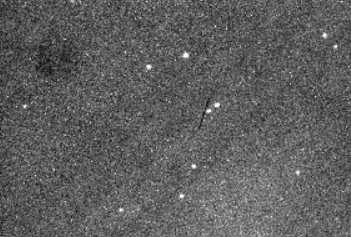


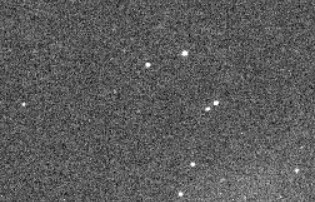

<span style="color:dodgerblue"> Here is an example of the image before and after the processing. The dust donut and the checkerboarding was removed from the B-raw image.

## Make your beautiful image!


<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 15)  Export your image and embed it below. Which parts of your image appear bluest? 

<span style="color:red">(8 points)</span>


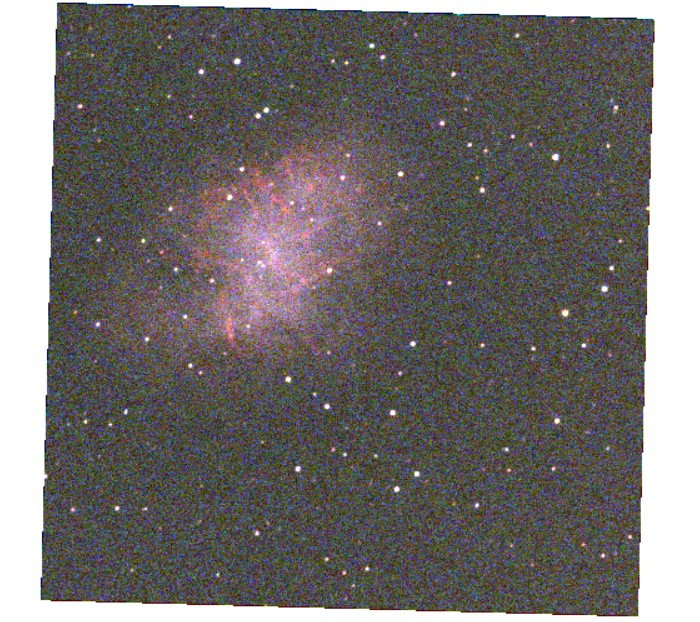

<span style="color:dodgerblue"> It looks the bluest in the center of the nebula and in the surrounding space.